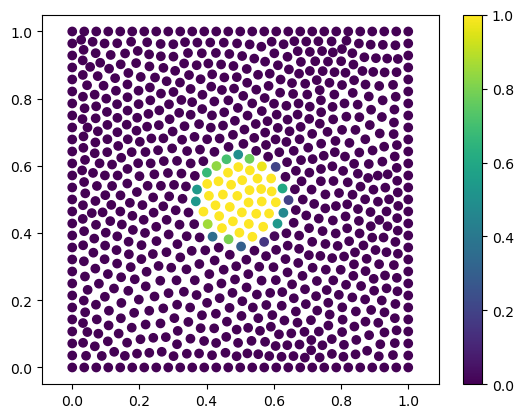

In [1]:
import numpy as np
import easypde
import matplotlib.pyplot as plt

points = easypde.pointcloud.scatter_points_on_square(800)

# Define u at t=0
u = np.clip(30*(0.15-np.sqrt(np.sum(np.square(points-np.array([0.5, 0.5])), axis=-1))), 0, 1)

easypde.plot_points(points, field=u)

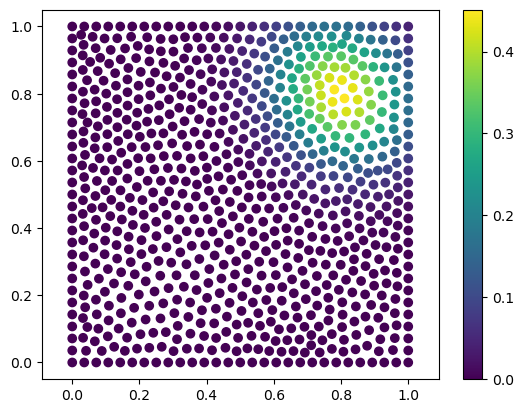

In [2]:
A = np.zeros((len(points), len(points)))
weight_distribution_radius = easypde.pointcloud.get_typical_distance(points)*0.1
for i, point in enumerate(points):
    x = point[0]
    y = point[1]
    easypde.edit_A(i, A, points, point, 16, [0, -1, -1, 0.03, 0, 0.03],
                   weight_distribution_radius=weight_distribution_radius)

dt = 0.01
for step in range(30):
    u += A@u*dt  # 1-order Euler method

easypde.plot_points(points, field=u)

In [3]:
points = np.mgrid[0:1:20j, 0:1:20j, 0:0.3:6j].T.reshape([-1, 3])

A = np.zeros((len(points), len(points)))
b = np.zeros(len(points))
weight_distribution_radius = easypde.pointcloud.get_typical_distance(points)*0.1
for i, point in enumerate(points):
    x = point[0]
    y = point[1]
    t = point[2]
    if t==0:
        easypde.edit_A_and_b(i, A, b, points, point, 7, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                             value=np.clip(30*(0.15-np.sqrt((x-0.5)**2+(y-0.5)**2)), 0, 1),  # u(x, 0)
                             weight_distribution_radius=weight_distribution_radius)
    else:
        easypde.edit_A_and_b(i, A, b, points, point, 27, [0, -1, -1, -1, 0.03, 0, 0, 0.03, 0, 0],
                             weight_distribution_radius=weight_distribution_radius)

solution = np.linalg.solve(A, b)

# Visualize solution on half of the box
visuable = points[:, 0]<=points[:, 1]
easypde.plot_points(points[visuable], field=solution[visuable], point_size=13)